# Importing libraries and loading dataset

In [2]:
# Starting from loading the libraries required for analysis
# This was first done step by step with each model and cell but was combined finally to make the file cleaner and shorter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# Loading the file to do EDA 

In [4]:
# Load data
file_path = 'Monthly_New.csv'
data = pd.read_csv(file_path)

# First few rows 
data.head()

,Year,Month,TotalPrimaryEnergyConsumption,TotalPrimaryEnergyProduction,TotalPrimaryEnergyExports,TotalPrimaryEnergyImports,TotalPrimaryEnergyConsumedbytheIndustrialSector,TotalPrimaryEnergyConsumedbytheResidentialSector,PrimaryEnergyStockChange
0,1973,1,7223.87,5404.72,125.78,1173.08,2027.03,1339.27,771.858
1,1973,2,6592.37,5155.12,120.88,1168.01,1841.30,1174.90,390.129
2,1973,3,6521.44,5419.56,139.95,1309.47,1926.41,983.37,-67.640
3,1973,4,5941.73,5160.81,194.19,1085.17,1914.02,715.39,-110.067
4,1973,5,6071.94,5411.25,196.78,1162.80,2076.47,535.91,-305.335


In [5]:
data.head()
data.info()
data.tail()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              600 non-null    int64  
 1   Month                                             600 non-null    int64  
 2   TotalPrimaryEnergyConsumption                     600 non-null    float64
 3   TotalPrimaryEnergyProduction                      600 non-null    float64
 4   TotalPrimaryEnergyExports                         600 non-null    float64
 5   TotalPrimaryEnergyImports                         600 non-null    float64
 6   TotalPrimaryEnergyConsumedbytheIndustrialSector   600 non-null    float64
 7   TotalPrimaryEnergyConsumedbytheResidentialSector  600 non-null    float64
 8   PrimaryEnergyStockChange                          600 non-null    float64
dtypes: float64(7), int64(2

,Year,Month,TotalPrimaryEnergyConsumption,TotalPrimaryEnergyProduction,TotalPrimaryEnergyExports,TotalPrimaryEnergyImports,TotalPrimaryEnergyConsumedbytheIndustrialSector,TotalPrimaryEnergyConsumedbytheResidentialSector,PrimaryEnergyStockChange
count,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,1997.50000,6.500000,7443.648367,6151.945150,614.810550,1873.345233,1806.877217,584.944550,33.168808
std,14.44291,3.454933,948.023811,900.046445,549.351969,560.824520,146.841942,321.885502,477.767649
min,1973.00000,1.000000,5435.630000,4306.800000,56.800000,710.560000,1466.350000,192.330000,-894.627000
25%,1985.00000,3.750000,6659.732500,5590.352500,310.907500,1449.070000,1712.015000,301.325000,-326.697750
50%,1997.50000,6.500000,7617.660000,5906.840000,373.645000,1848.500000,1808.625000,484.745000,-80.120000
75%,2010.00000,9.250000,8112.430000,6296.127500,683.970000,2278.337500,1895.445000,874.320000,327.448000
max,2022.00000,12.000000,9664.300000,8813.290000,2427.220000,3149.640000,2267.320000,1488.040000,1551.345000


In [6]:
# List of columns to include in the description (excluding "Year", "Id", and "Units")
columns_to_include = ['TotalPrimaryEnergyProduction', 'TotalPrimaryEnergyConsumption', 'TotalPrimaryEnergyExports', 'TotalPrimaryEnergyImports',
                      'TotalPrimaryEnergyConsumedbytheIndustrialSector', 'TotalPrimaryEnergyConsumedbytheResidentialSector', 'PrimaryEnergyStockChange']

# Use describe() on the selected columns
description = data[columns_to_include].describe()

# Print the description
print(description)

       TotalPrimaryEnergyProduction  TotalPrimaryEnergyConsumption  \
count                    600.000000                     600.000000   
mean                    6151.945150                    7443.648367   
std                      900.046445                     948.023811   
min                     4306.800000                    5435.630000   
25%                     5590.352500                    6659.732500   
50%                     5906.840000                    7617.660000   
75%                     6296.127500                    8112.430000   
max                     8813.290000                    9664.300000   

       TotalPrimaryEnergyExports  TotalPrimaryEnergyImports  \
count                 600.000000                 600.000000   
mean                  614.810550                1873.345233   
std                   549.351969                 560.824520   
min                    56.800000                 710.560000   
25%                   310.907500                1449.0

**Total Primary Energy Production:**
- On average, the total primary energy production is around 6151.95 units.
- The values range from 4306.80 to 8813.29.
- The data has a moderate spread as indicated by the standard deviation.

---

**Total Primary Energy Consumption:**
- On average, the total primary energy consumption is around 7443.65 units.
- The values range from 5435.63 to 9664.30.
- The data has a relatively wide spread as indicated by the standard deviation.

---

**Total Primary Energy Consumed by the Industrial Sector:**
- The data has a mean consumption of 1806.88 units by the industrial sector.
- The values range from 1466.35 to 2267.32.
- The standard deviation is relatively low, indicating a moderate spread in the data.

---

**Total Primary Energy Consumed by the Residential Sector:**
- The data has a mean consumption of 584.94 units by the residential sector.
- The values range from 192.33 to 1488.04.
- The standard deviation is relatively high, suggesting a wide spread in the data.

---

**Total Primary Energy Exports:**
- On average, there are 614.81 units of primary energy exported.
- The values range from 56.80 to 2427.22.
- The data has a wide spread as indicated by the standard deviation.

---

**Total Primary Energy Imports:**
- On average, there are 1873.35 units of primary energy imported.
- The values range from 710.56 to 3149.64.
- The data has a moderate spread as indicated by the standard deviation.

---

**Primary Energy Stock Change:**
- On average, the primary energy stock change is around 33.17 units.
- The values range from -894.63 to 1551.35.
- The data has a significant spread, as indicated by the relatively high standard deviation. Negative values suggest a decrease in energy stock on average.


# Data Visulization

### Time-Series Plots

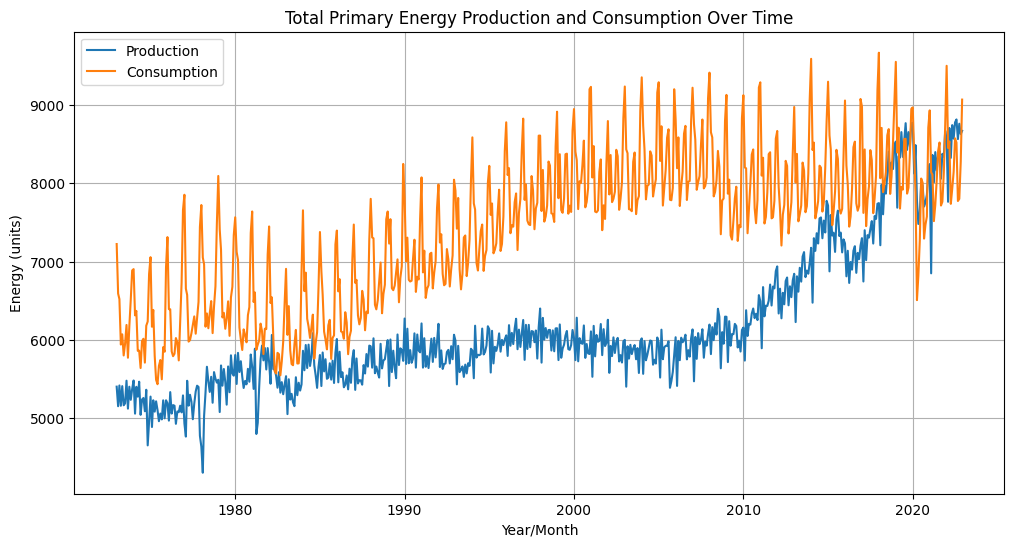

In [5]:
# Combining 'Year' and 'Month' columns into a single datetime column for the x-axis
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str), format='%Y-%m')

# Time Series Plots
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['TotalPrimaryEnergyProduction'], label='Production')
plt.plot(data['Date'], data['TotalPrimaryEnergyConsumption'], label='Consumption')
plt.xlabel('Year/Month')
plt.ylabel('Energy (units)')
plt.title('Total Primary Energy Production and Consumption Over Time')
plt.legend()
plt.grid()
plt.show()



**Time-Series plot - Total Primary Energy Production and Consumption:**

Looking at the time-series plot of Total Primary Production and Consumption, there are some clear trends and complex seasonality. From the 1980s to around 2000, energy production goes on a bit of a rollercoaster with big spikes and drops, suggesting more energy was produced than consumed. Consumption also goes up and down during this time but not as dramatically. However in the early 2000s, both production and consumption increased simultaneously. After 2010, the plot indicates a closer match between production and consumption, and a reduction in production volatility. Those wild swings in production back in the day might be because of changes in energy rules, how the economy was doing, or new technology. And the slow increase in how much we use is probably because more people, more industries, and more gadgets need energy. 

Overall, there is a continuous upward trend and clear seasonality for both Production and Consumption. 

# ACF and PACF plots for Production and Consumption

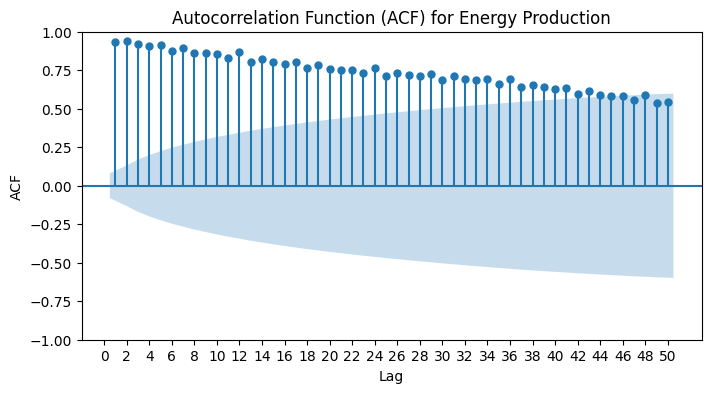

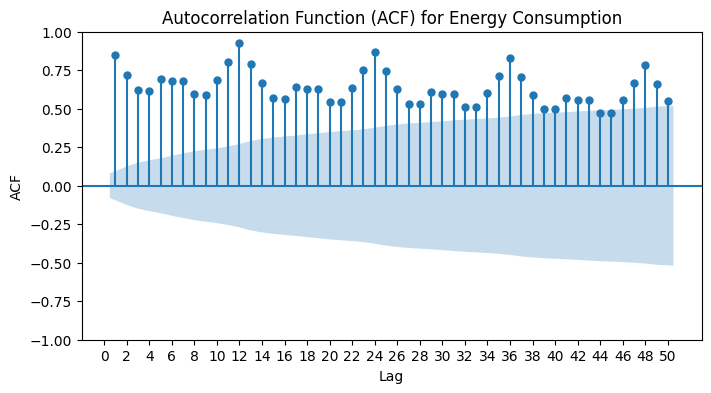

In [15]:
# PRODUCTION
# Setting the number of lags to create ACF plot
lags = 50

# Creating a figure for ACF
fig, ax = plt.subplots(figsize=(8, 4))

# ACF plot for 'Total Primary Energy Production'
plot_acf(data['TotalPrimaryEnergyProduction'].dropna(), lags=lags, zero=False, ax=ax)
ax.set_title('Autocorrelation Function (ACF) for Energy Production')
ax.set_xlabel('Lag')
ax.set_ylabel('ACF')
ax.set_xticks(range(0, lags + 1, 2))  

plt.show()  


# CONSUMPTION
# Setting the number of lags to create ACF plot
lags = 50

# Creating a figure for ACF
fig, ax = plt.subplots(figsize=(8, 4))

# ACF plot for 'Total Primary Energy Consumption'
plot_acf(data['TotalPrimaryEnergyConsumption'].dropna(), lags=lags, zero=False, ax=ax)
ax.set_title('Autocorrelation Function (ACF) for Energy Consumption')
ax.set_xlabel('Lag')
ax.set_ylabel('ACF')
ax.set_xticks(range(0, lags + 1, 2)) 

plt.show() 

**ACF plot - Total Primary Energy Production and Consumption:**

- The autocorrelation function (ACF) plot validates the patterns (Trend and seasonality) observed in the time series plot for both Consumption and Production.
- ACF plot for Production shows autocorrelation peaks at lags 2, 12, and 24, indicating increased production during these periods.
- Similarly, in Consumption, autocorrelation increases at lags 1, 12, 24, and 36, signifying heightened consumption during these intervals.


# Histogram and Box Plots

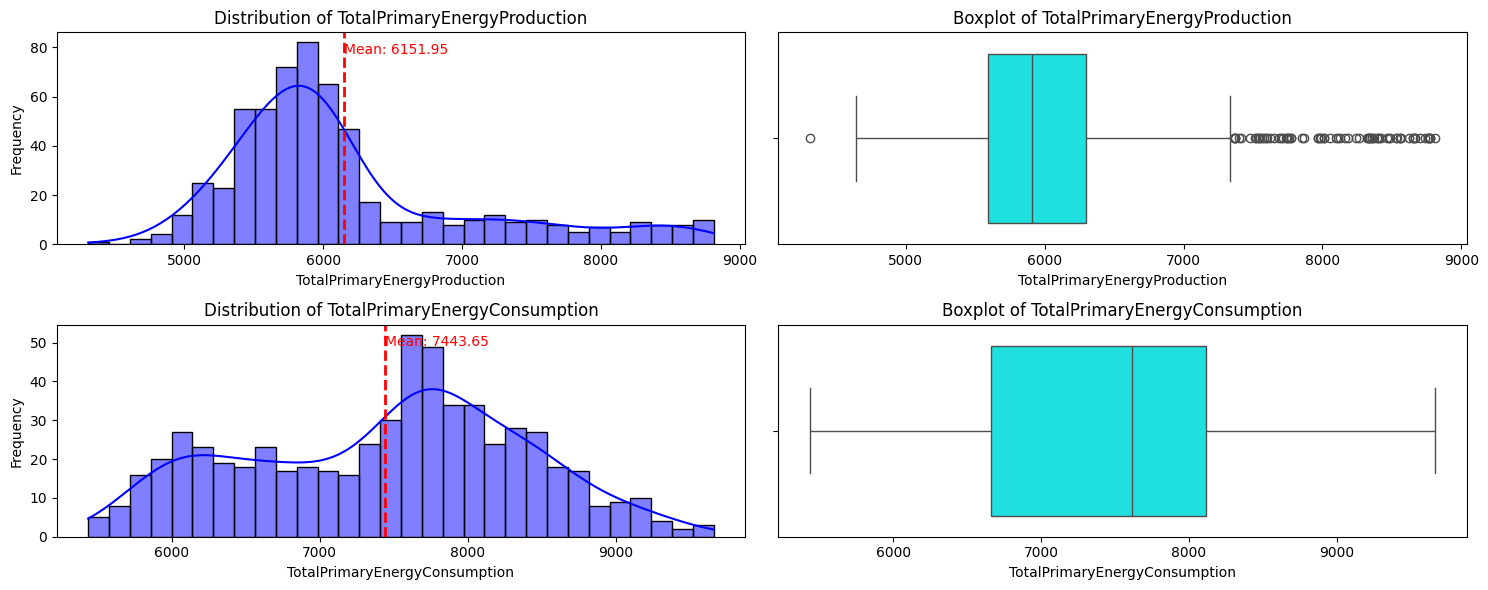

In [24]:
# Setting up the plotting area for the distribution of features in two columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))

# Features to plot
selected_features = ['TotalPrimaryEnergyProduction', 'TotalPrimaryEnergyConsumption']

# Looping through each feature to create distribution plots and boxplots side by side
for i, feature in enumerate(selected_features):
    # Distribution plot with a trend line (Kernel Density Estimate (KDE) is shown by default)
    sns.histplot(data[feature], kde=True, ax=axes[i, 0], color="blue", bins=30)
    axes[i, 0].set_title(f'Distribution of {feature}')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Frequency')
    
    # Adding a trend line for mean
    mean_value = data[feature].mean()
    axes[i, 0].axvline(mean_value, color='red', linestyle='--', linewidth=2)
    min_ylim, max_ylim = axes[i, 0].get_ylim()
    axes[i, 0].text(mean_value, max_ylim*0.9, f'Mean: {mean_value:.2f}', color='red')

    # Boxplot to show the quartiles and outliers
    sns.boxplot(x=data[feature], ax=axes[i, 1], color="cyan")
    axes[i, 1].set_title(f'Boxplot of {feature}')
    axes[i, 1].set_xlabel(feature)

# Adjusting the layout
plt.tight_layout()
plt.show()


**Energy Production Histogram:**
- The histogram displays the distribution of energy production values.
- It forms a bell-shaped curve, suggesting an approximate normal distribution.
- Values cluster around the mean, indicating a central tendency.

**Energy Production BoxPlot:**
- The box in the middle represents the middle 50% of the data, with the line inside indicating the median.
- Notably, there is one lower outlier and several upper outliers.
- These outliers signify values significantly lower or higher than the majority of the data.

---

**Energy Consumption Histogram:**
- Similar to the production histogram but with a different scale on the horizontal axis.
- The mean, marked by a red dashed line, is higher for consumption at 7443.65 units.
- This suggests, on average, more energy is consumed than produced in the dataset.
- The distribution seems slightly skewed to the right, indicating more instances of higher consumption values compared to production.

**Energy Consumption BoxPlot:**
- No outliers are apparent in the consumption data.
- The whiskers cover a narrower range compared to the production boxplot, suggesting less variability in consumption values.
.
d to production.
 to production.
on.
ion.

## Corelation Analysis

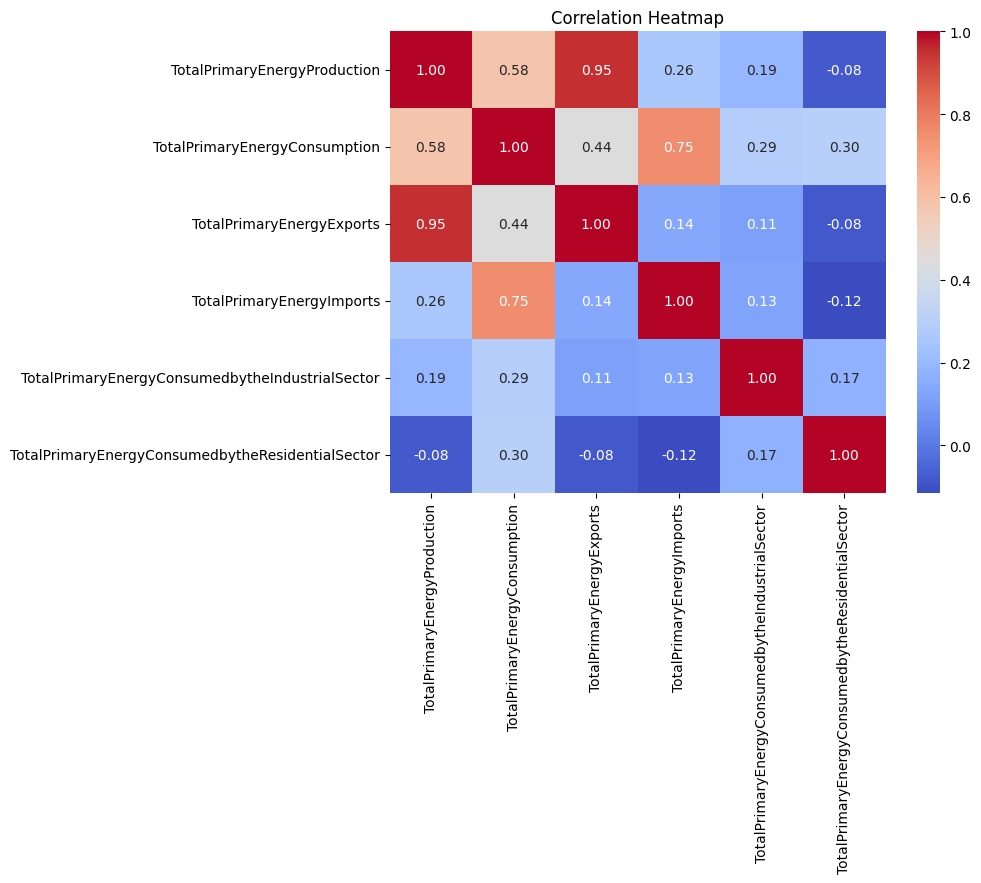

In [14]:
# Assuming you have a DataFrame 'energy' with 'Total Primary Energy Production' and 'Total Primary Energy Consumption' columns

# Calculate the correlation matrix
correlation_matrix = data[['TotalPrimaryEnergyProduction', 'TotalPrimaryEnergyConsumption', 'TotalPrimaryEnergyExports', 'TotalPrimaryEnergyImports',
                      'TotalPrimaryEnergyConsumedbytheIndustrialSector', 'TotalPrimaryEnergyConsumedbytheResidentialSector']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Analysis**

**Production**:
- Exports demonstrate the highest correlation, followed by Consumption, Imports, and the Industrial sector.
- The Residential sector shows a negative correlation with Production.

**Consumption**:
- Imports exhibit the highest correlation, followed by Production, Exports, Residential, and the Industrial sector.
 sector.
 sector.


# Checking the significance of variables based on its p-values

In [4]:
# Assuming you have a DataFrame 'df' containing your data
X = data[['TotalPrimaryEnergyConsumption', 'TotalPrimaryEnergyExports', 'TotalPrimaryEnergyImports', 'TotalPrimaryEnergyConsumedbytheIndustrialSector', 'TotalPrimaryEnergyConsumedbytheResidentialSector', 'PrimaryEnergyStockChange']]
y = data['TotalPrimaryEnergyProduction']

# Perform an F-test
f_values, p_values = f_regression(X, y)

# Create a DataFrame to view results
f_test_results = pd.DataFrame({'Feature': X.columns, 'F-Value': f_values, 'P-Value': p_values})

# Set the display format for float columns to show p-values as numbers
pd.options.display.float_format = '{:.10f}'.format

f_test_results

,Feature,F-Value,P-Value
0,TotalPrimaryEnergyConsumption,308.6382922726,0.0000000000
1,TotalPrimaryEnergyExports,5710.8985812870,0.0000000000
2,TotalPrimaryEnergyImports,43.6202564053,0.0000000001
3,TotalPrimaryEnergyConsumedbytheIndustrialSector,22.4578050236,0.0000026870
4,TotalPrimaryEnergyConsumedbytheResidentialSector,3.6166446511,0.0576844257
5,PrimaryEnergyStockChange,2.2922575323,0.1305490188


**Analysis**:
- Summarizing, the key predictors for forecasting Total Primary Energy Production are TotalPrimaryEnergyConsumption, TotalPrimaryEnergyExports, and TotalPrimaryEnergyImports.
- TotalPrimaryEnergyConsumedbytheIndustrialSector holds a moderate level of significance in the predictive model.
- Conversely, TotalPrimaryEnergyConsumedbytheResidentialSector does not achieve statistical significance at the common alpha level of 0.05.
- Additionally, the Primary Energy Stock Change has a p-value exceeding alpha, indicating it lacks considerable significance in the forecasting context.


In [5]:
# Assuming you have a DataFrame 'df' containing your data
X = data[['TotalPrimaryEnergyProduction', 'TotalPrimaryEnergyExports', 'TotalPrimaryEnergyImports', 'TotalPrimaryEnergyConsumedbytheIndustrialSector', 'TotalPrimaryEnergyConsumedbytheResidentialSector', 'PrimaryEnergyStockChange']]
y = data['TotalPrimaryEnergyConsumption']

# Perform an F-test
f_values, p_values = f_regression(X, y)

# Create a DataFrame to view results
f_test_results = pd.DataFrame({'Feature': X.columns, 'F-Value': f_values, 'P-Value': p_values})

# Set the display format for float columns to show p-values as numbers
pd.options.display.float_format = '{:.10f}'.format

f_test_results

,Feature,F-Value,P-Value
0,TotalPrimaryEnergyProduction,308.6382922726,0.0000000000
1,TotalPrimaryEnergyExports,147.2821367845,0.0000000000
2,TotalPrimaryEnergyImports,784.9569467780,0.0000000000
3,TotalPrimaryEnergyConsumedbytheIndustrialSector,55.5183828017,0.0000000000
4,TotalPrimaryEnergyConsumedbytheResidentialSector,59.4094142978,0.0000000000
5,PrimaryEnergyStockChange,212.3672486341,0.0000000000


**Analysis**:

- All the variables are pretty much significant since they have p-value less than alpha

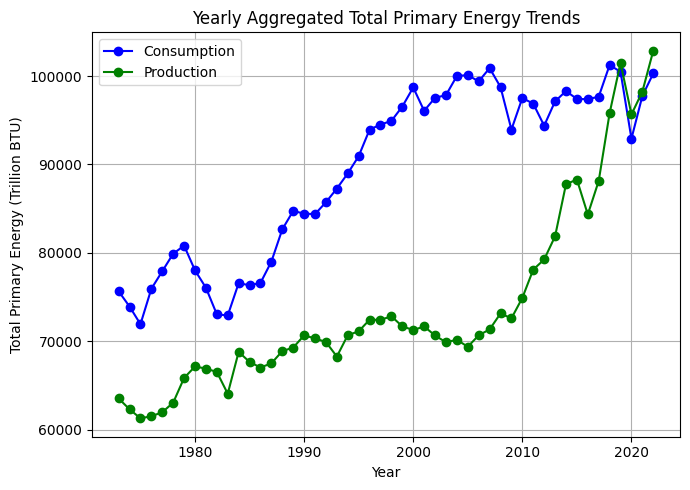

In [35]:
# Aggregating data yearly
yearly_data = data.groupby('Year').agg({
    'TotalPrimaryEnergyConsumption': 'sum',
    'TotalPrimaryEnergyProduction': 'sum'
}).reset_index()

# Setting up the plot
plt.figure(figsize=(7, 5))

# Plotting the yearly aggregated data for total energy consumption, production, imports, and exports
plt.plot(yearly_data['Year'], yearly_data['TotalPrimaryEnergyConsumption'], label='Consumption', color='blue', marker='o')
plt.plot(yearly_data['Year'], yearly_data['TotalPrimaryEnergyProduction'], label='Production', color='green', marker='o')

# Adding labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Total Primary Energy (Trillion BTU)')
plt.title('Yearly Aggregated Total Primary Energy Trends')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()


**Annual Time-Series**:

- The yearly production and consumption time-series plot doesn't exhibit seasonality as clearly as it does in monthly data.
- The decision to use monthly data was driven by its clearer display of seasonal patterns, aiding in more detailed analysis.
- Consistent gap between production and consumption until the mid-2000s, with production showing a sharper rise thereafter.
- Reflects a dynamic energy scenario where production doesn't always keep up with consumption, but recent efforts indicate a move towards a more balanced energy profile.
nds.


In [26]:
# Calculating the year-over-year growth rate for consumption and production
yearly_data['Consumption_Growth_Rate'] = yearly_data['TotalPrimaryEnergyConsumption'].pct_change() * 100
yearly_data['Production_Growth_Rate'] = yearly_data['TotalPrimaryEnergyProduction'].pct_change() * 100

# Extracting relevant columns for display
growth_rate_data = yearly_data[['Year', 'Consumption_Growth_Rate', 'Production_Growth_Rate']]

growth_rate_data.tail(6)  # Displaying the last 10 years for clarity

,Year,Consumption_Growth_Rate,Production_Growth_Rate
44,2017,0.282662,4.493317
45,2018,3.669614,8.705090
46,2019,-0.752942,5.932730
47,2020,-7.530191,-5.748519
48,2021,5.196845,2.695166
49,2022,2.612415,4.712729


**Analysis**:

- Consumption and production growth rates exhibit annual fluctuations.
- The year 202ndicates 0h significant decreases in both consumption and production growth rates, likely influenced by impactful events or external factors affecting the energy sector.
- The following years, 2021 and 2022, demonstrate a rebound in growth rates, showcasing positive percentages and indicating a recovery or growth in both energy consumption and production.
- Overall, in line with our analysis, the growth rate of production is higher than that of consumption.


## EDA for other variables like exports, imports etc

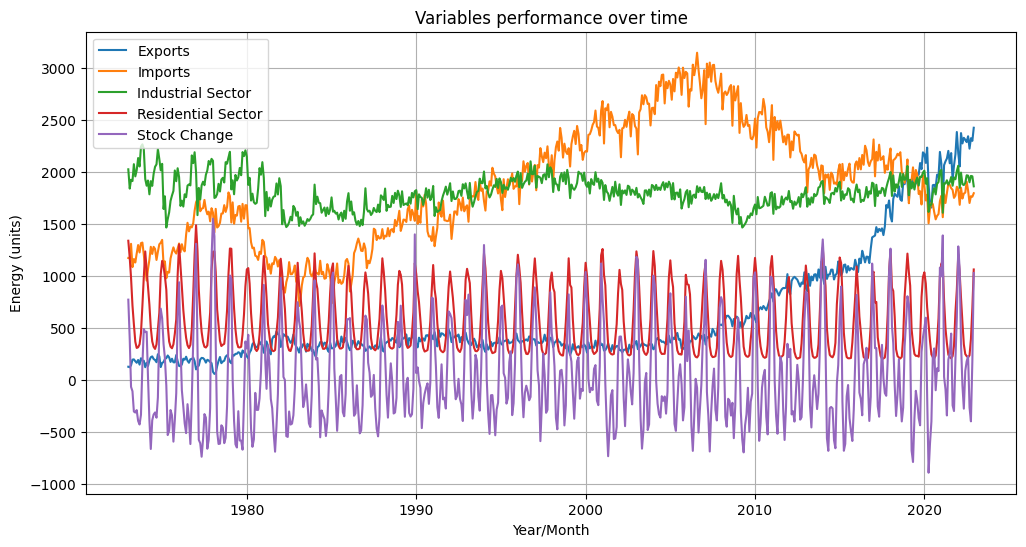

In [16]:
# Combine 'Year' and 'Month' columns into a single datetime column for the x-axis
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str), format='%Y-%m')

# Time Series Plots
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['TotalPrimaryEnergyExports'], label='Exports')
plt.plot(data['Date'], data['TotalPrimaryEnergyImports'], label='Imports')
plt.plot(data['Date'], data['TotalPrimaryEnergyConsumedbytheIndustrialSector'], label='Industrial Sector')
plt.plot(data['Date'], data['TotalPrimaryEnergyConsumedbytheResidentialSector'], label='Residential Sector')
plt.plot(data['Date'], data['PrimaryEnergyStockChange'], label='Stock Change')
plt.xlabel('Year/Month')
plt.ylabel('Energy (units)')
plt.title('Variables performance over time')
plt.legend()
plt.grid()
plt.show()



**Analysis**

- All sectors show an increase in energy units over time.
- Exports and imports have become more volatile.
- Industrial and residential sectors show a more consistent growth trend.
- Seasonal patterns are evident in stock change, aligning with the fluctuations in the economy, which is expected given the economic ups and downs.
- In summary, these graphics will help spot trends and patterns, revealing a notable shift in energy trends over the past two decades. This valuable insight will aid in predicting both production and consumption.

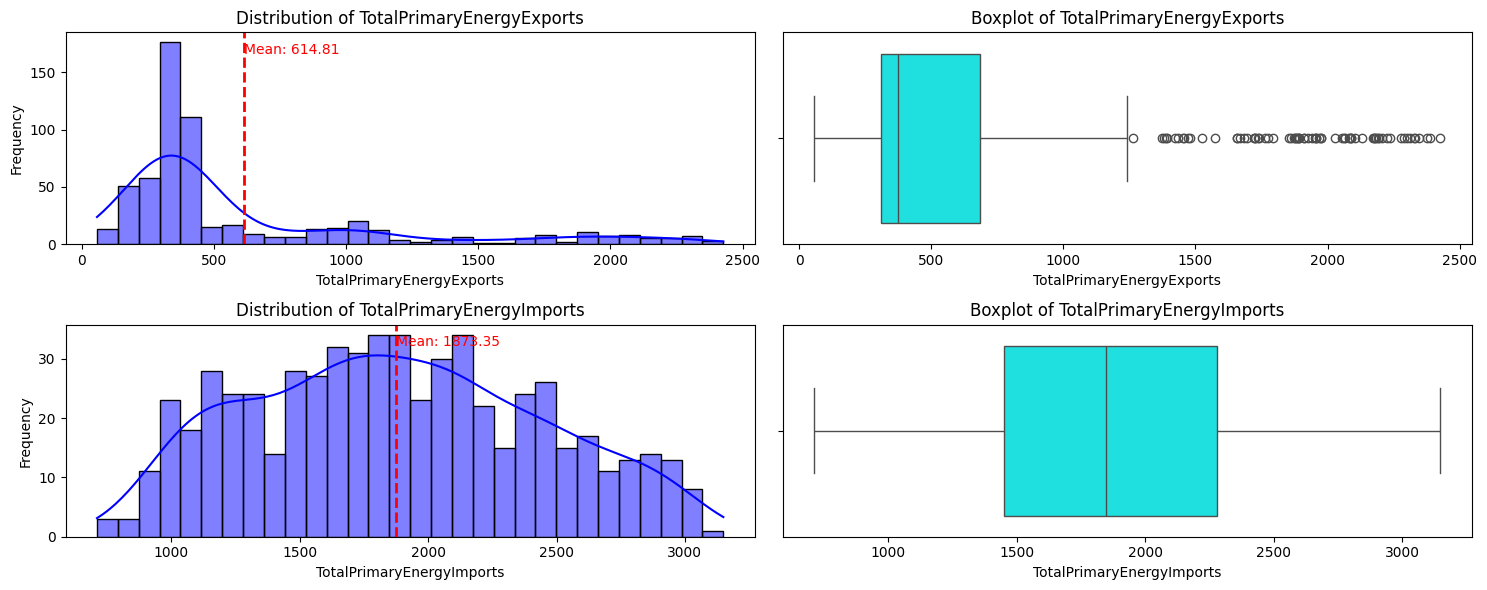

In [32]:
# Setting up the plotting area for the distribution of features in two columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))

# Features to plot
selected_features = ['TotalPrimaryEnergyExports', 'TotalPrimaryEnergyImports']

# Looping through each feature to create distribution plots and boxplots side by side
for i, feature in enumerate(selected_features):
    # Distribution plot with a trend line (Kernel Density Estimate (KDE) is shown by default)
    sns.histplot(data[feature], kde=True, ax=axes[i, 0], color="blue", bins=30)
    axes[i, 0].set_title(f'Distribution of {feature}')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Frequency')
    
    # Adding a trend line for mean
    mean_value = data[feature].mean()
    axes[i, 0].axvline(mean_value, color='red', linestyle='--', linewidth=2)
    min_ylim, max_ylim = axes[i, 0].get_ylim()
    axes[i, 0].text(mean_value, max_ylim*0.9, f'Mean: {mean_value:.2f}', color='red')

    # Boxplot to show the quartiles and outliers
    sns.boxplot(x=data[feature], ax=axes[i, 1], color="cyan")
    axes[i, 1].set_title(f'Boxplot of {feature}')
    axes[i, 1].set_xlabel(feature)

# Adjusting the layout
plt.tight_layout()
plt.show()


**Analysis**:
- Energy exports have a lower mean and a right-skewed distribution, indicating occasional high export values.
- Energy imports have a higher mean and a more normal distribution, suggesting consistency in import quantities.
- Boxplots emphasize outliers in exports but not in imports, highlighting larger variability in export quantities.
- Overall, useful for forecasting and analyzing stability in energy production and consumption.

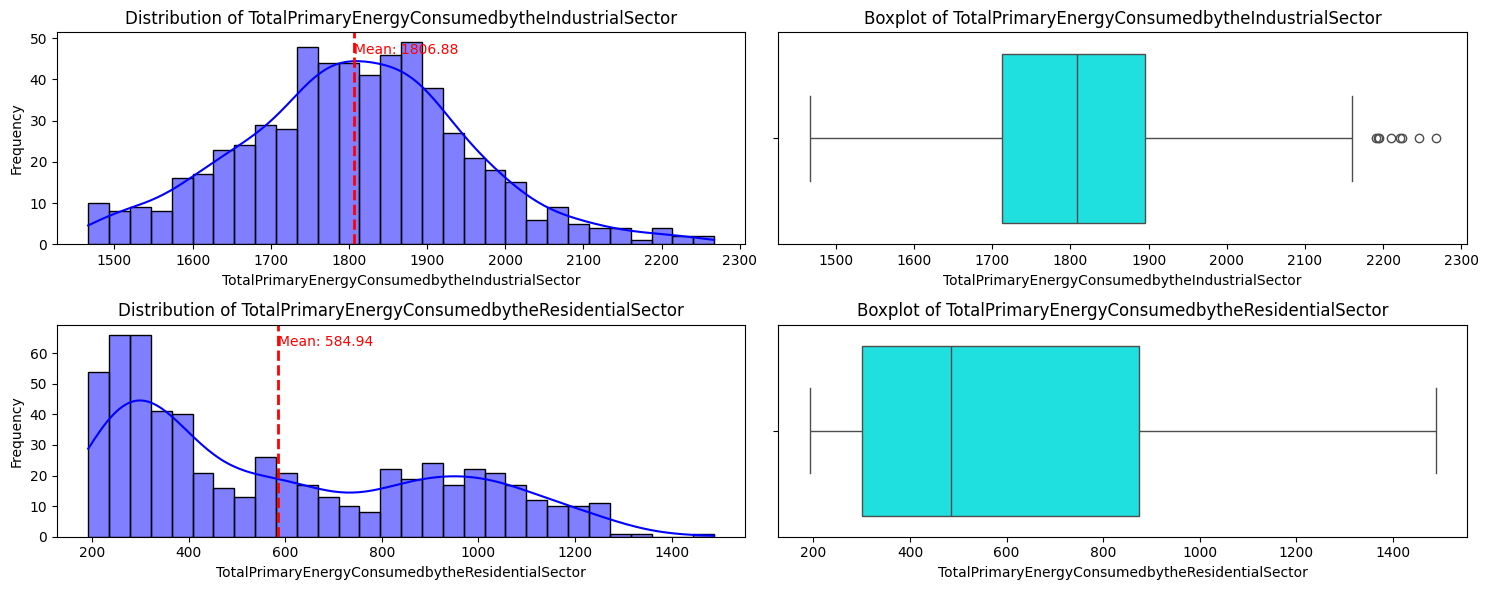

In [17]:
# Setting up the plotting area for the distribution of features in two columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))

# Features to plot
selected_features = ['TotalPrimaryEnergyConsumedbytheIndustrialSector', 'TotalPrimaryEnergyConsumedbytheResidentialSector']

# Looping through each feature to create distribution plots and boxplots side by side
for i, feature in enumerate(selected_features):
    # Distribution plot with a trend line (Kernel Density Estimate (KDE) is shown by default)
    sns.histplot(data[feature], kde=True, ax=axes[i, 0], color="blue", bins=30)
    axes[i, 0].set_title(f'Distribution of {feature}')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Frequency')
    
    # Adding a trend line for mean
    mean_value = data[feature].mean()
    axes[i, 0].axvline(mean_value, color='red', linestyle='--', linewidth=2)
    min_ylim, max_ylim = axes[i, 0].get_ylim()
    axes[i, 0].text(mean_value, max_ylim*0.9, f'Mean: {mean_value:.2f}', color='red')

    # Boxplot to show the quartiles and outliers
    sns.boxplot(x=data[feature], ax=axes[i, 1], color="cyan")
    axes[i, 1].set_title(f'Boxplot of {feature}')
    axes[i, 1].set_xlabel(feature)

# Adjusting the layout
plt.tight_layout()
plt.show()


**Analysis**:
- The industrial sector displays a more normal distribution of energy consumption with a higher mean than the residential sector.
- The residential sector's energy consumption varies more, with a skew towards higher values, indicating occasional high consumption periods or instances.
- Boxplots visually summarize that the industrial sector has a tighter consumption pattern with a few higher outliers, while the residential sector has a wider spread of consumption values.
- The industrial sector's consumption pattern suggests stability and predictability.
- The residential sector's consumption pattern indicates a wider range of variability influenced by factors like seasonal changes, economic conditions, or changes in residential energy efficiency.
- Overall, useful for forecasting Production and Consumption.